# Features 2
Acá probamos diferentes modelos para las features 2.
|hora|dia_semana|mes|es_feriado|total_bicis_salieron_global|pct_mujeres_salieron_global|pct_hombres_salieron_global|q1_edad_salieron_global|media_edad_salieron_global|q3_edad_salieron_global|pct_iconic_salieron_global|pct_fit_salieron_global|bicis_salieron_estacion_2| ... | bicis_salieron_estacion_x|llegadas_estacion_2_h1| ...|llegadas_estacion_x_h24|target_estacion_2| ... |target_estacion_x|

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import importlib

In [38]:
import models_f2 as md2
import data_processing as dp
import metrics as mt

In [33]:
BASE_DIR = os.getcwd()
train_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'train_dataset_features2.csv')
val_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'val_dataset_features2.csv')
test_f2_path = os.path.join(BASE_DIR, '..', '..','data', 'processed', 'features2', 'test_dataset_features2.csv')

In [34]:
train_f2 = pd.read_csv(train_f2_path)
val_f2 = pd.read_csv(val_f2_path)
test_f2 = pd.read_csv(test_f2_path)

Creamos un dataset que solo usa la estación de la facultad de derecho porque es la que más viajes tiene.

In [35]:
# 202
importlib.reload(dp)
df_filtrado_train_202 = dp.filtrar_dataset_por_estaciones(train_f2, [202], verbose=False)
X_train_202, y_train_202, feature_names_train_202 = dp.dividir_dataset_estacion(df_filtrado_train_202, 202)

df_filtrado_val_202 = dp.filtrar_dataset_por_estaciones(val_f2, [202], verbose=False)
X_val_202, y_val_202, feature_names_val_202 = dp.dividir_dataset_estacion(df_filtrado_val_202, 202, verbose=False)

df_filtrado_test_202 = dp.filtrar_dataset_por_estaciones(test_f2, [202], verbose=False)
X_test_202, y_test_202, feature_names_test_202 = dp.dividir_dataset_estacion(df_filtrado_test_202, 202, verbose=False)



Dataset filtrado: (12108, 5082) → (12108, 401) (estaciones: [202])
✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 401)
Features (X): (12108, 39)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 39

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset filtrado: (1950, 4970) → (1950, 393) (estaciones: [202])
Dataset dividido estación 202: X(1950, 39), y(1950,)
Dataset filtrado: (2037, 5096) → (2037, 402) (estaciones: [202])
Dataset dividido estación 202: X(2037, 39), y(2037,)


# Modelos básicos
Corremos modelos básicos con hiperparámetros arbitrarios para ver como es la situación actual. Mostramos para cada modelo las métricas.

In [36]:
importlib.reload(md2)
pred_202 = md2.linear_regression(X_train_202, y_train_202, X_val_202)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.2021
                Mean Squared Error                 3.5738
           Root Mean Squared Error                 1.8905
                         R-squared                 0.6643
Mean Absolute Percentage Error (%) 155611118851783136.00%
                Explained Variance                 0.6700
                     Maximum Error                12.7255
                       Correlation                 0.8195
                              Bias                 0.2466
                Relative Error (%)         3455260969.35%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2348
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8015
                Número de Mue

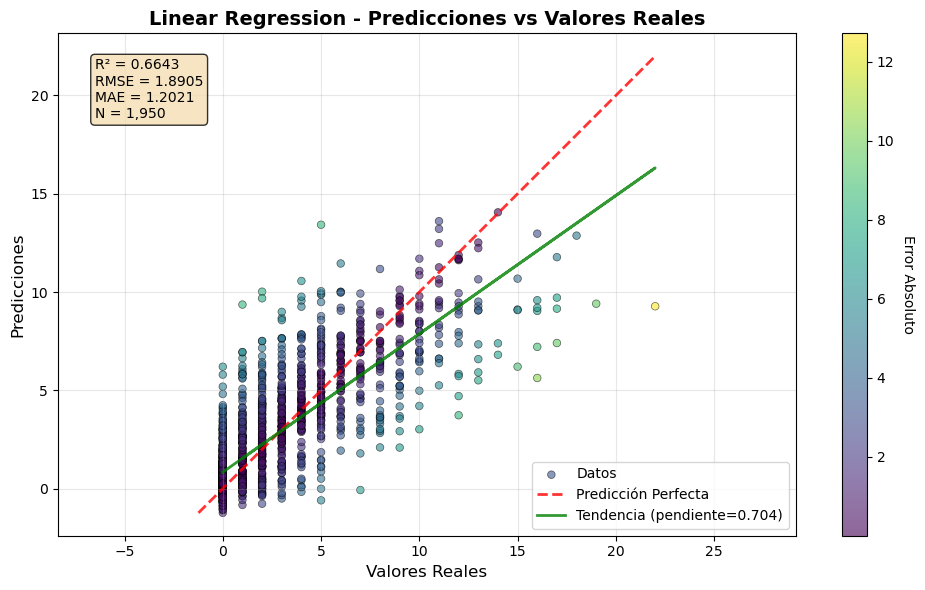

In [44]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202, "Linear Regression")

# Visualización de las features 2
Hacemos PCA y visualizamos, imprimimos estadísticas descriptivas y graficamos las distribuciones de las features. Cualquier cosa que ayude.

# Feature engineering
Acomodamos features, relacionamos, sacamos, reducimos la dimensionalidad, etc. para mejorar el modelo en base a lo que vimos en la visualización.

# Cross validation
Elegimos los óptimos hiperparámetros.

# Entrenamientos finales
Entrenamos los modelos finales con los hiperparámetros óptimos y guardamos los resultados.